In [1]:
import numpy as np

Сначала считываем размерность n, количество матриц k, матрицы D0, D1, D2, параметры равномерного распределеня T1 и T2 и вектор стационарных вероятностей Π(0).

In [2]:
task = open("task.txt", "r")
n = int(task.readline())
k = int(task.readline())
D = []
for j in range(k):
    line = task.readline()
    D.append(np.matrix(line))
print(D)
T1 = float(task.readline())
T2 = float(task.readline())
pi0 = np.matrix(task.readline())

[matrix([[-1.45,  0.2 ,  0.15,  0.1 ],
        [ 0.2 , -2.6 ,  0.1 ,  0.3 ],
        [ 0.2 ,  0.1 , -3.7 ,  0.4 ],
        [ 0.1 ,  0.05,  0.15, -4.3 ]]), matrix([[0.5, 0. , 0. , 0. ],
        [0. , 1. , 0. , 0. ],
        [0. , 0. , 1.5, 0. ],
        [0. , 0. , 0. , 2. ]]), matrix([[0.5, 0. , 0. , 0. ],
        [0. , 1. , 0. , 0. ],
        [0. , 0. , 1.5, 0. ],
        [0. , 0. , 0. , 2. ]])]


D0, D1, D2 - матрицы, описывающие поведение потока. D - список этих матриц

In [3]:
D

[matrix([[-1.45,  0.2 ,  0.15,  0.1 ],
         [ 0.2 , -2.6 ,  0.1 ,  0.3 ],
         [ 0.2 ,  0.1 , -3.7 ,  0.4 ],
         [ 0.1 ,  0.05,  0.15, -4.3 ]]),
 matrix([[0.5, 0. , 0. , 0. ],
         [0. , 1. , 0. , 0. ],
         [0. , 0. , 1.5, 0. ],
         [0. , 0. , 0. , 2. ]]),
 matrix([[0.5, 0. , 0. , 0. ],
         [0. , 1. , 0. , 0. ],
         [0. , 0. , 1.5, 0. ],
         [0. , 0. , 0. , 2. ]])]

In [4]:
e = np.full([n,1], 1)
e_ = np.full([n,1], 0)
e_[0] = 1

In [5]:
I_ = np.matrix(np.diag((e-e_).transpose()[0]))
I = np.matrix(np.diag(e.transpose()[0]))

In [6]:
e_ = e_.transpose()

D_1 - инфинитезиальный генератор процесса

In [7]:
D_1 = sum(D)

In [8]:
D_1

matrix([[-0.45,  0.2 ,  0.15,  0.1 ],
        [ 0.2 , -0.6 ,  0.1 ,  0.3 ],
        [ 0.2 ,  0.1 , -0.7 ,  0.4 ],
        [ 0.1 ,  0.05,  0.15, -0.3 ]])

In [9]:
def find_theta(matr, e):
    D_1e = np.concatenate((matr.transpose(), e.transpose()))
    c = np.concatenate((np.zeros([n,1]), np.matrix(1)))
    theta = np.linalg.lstsq(a = D_1e, b = c)
    theta = theta[0].reshape((1, n))
    return theta

In [10]:
def find_b(T1, T2):
    b = []
    deltaT = T2 - T1
    for i in range(4):
        b.append(deltaT**(i+1)/(i+2))
    return b

находим вектор 𝜃 из системы уравнений: <br>
𝜃𝐷(1) = 0, <br>
𝜃e = 1.

In [11]:
theta = find_theta(D_1, e)

/Users/jana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [12]:
theta

matrix([[0.23870418, 0.14492754, 0.16794544, 0.44842285]])

dD - список производных производящих функций при z = 1

In [13]:
dD = []

In [14]:
dD.append(D_1)

In [15]:
for i in range(4):
    dD.append(np.matrix(np.zeros([n,n])))

In [16]:
for index, matrix in enumerate(D):
    dD[1] += index * matrix
    dD[2] += index * (index - 1) * matrix
    dD[3] += index * (index - 1) * (index - 2) * matrix
    dD[4] += index * (index - 1) * (index - 2) * (index - 3) * matrix

b - список начальных моментов распределения B(t) <br>
T1, T2 - параметры равномерного распределения


In [17]:
b = find_b(T1, T2)

In [18]:
b

[0.2, 0.053333333333333344, 0.016000000000000004, 0.005120000000000001]

коэффициент 𝜆 находим из уравнения: <br>
𝜆 = 𝜃𝐷′(1)e,
где 𝐷′(1) = ∑︁k*Dk*z^(k-1)    /сумма от k=0 до k=+inf (кол-во матриц D)

In [19]:
lambda_ = theta * dD[1] * e

In [20]:
lambda_

matrix([[4.23913043]])

In [21]:
def find_A(d_mtrx, b):
    A = []
    A.append(d_mtrx[0])
    A.append(-d_mtrx[1] * b[0])
    A.append((d_mtrx[2] * b[0]**2 + d_mtrx[1] * b[1])/2)
    A.append(-(d_mtrx[3] * b[0]**3 + 3 * d_mtrx[2] * b[0] * b[1] + d_mtrx[1] * b[2])/6)
    A.append((d_mtrx[4] * b[0]**4 + 6 * d_mtrx[3] * b[0]**2 * b[1] + 4 * d_mtrx[2] * b[0] * b[2] + 
              3 * d_mtrx[2] * b[1]**2 + d_mtrx[1] * b[3])/24)
    return A

In [22]:
def find_wr(mtrx, b, lmbd, pi0, I_, I, A, A_):
    p0 = lmbd * pi0 * np.linalg.inv(-mtrx[0])
    w = []
    w.append(theta)
    A_inv = np.linalg.inv(A_)
    w.append(((w[0] * (I + A[1]) - p0) * I_ + w[0] * A[2] * e * e_) * A_inv)
    w.append(-2 * ((w[0] * A[2] - w[1] * (I + A[1])) * I_ + (w[0] * A[3] + w[1] * A[2]) * e * e_) * A_inv)
    w.append(3 * ((2 * w[0] * A[3] - 2 * w[1] * A[2] + w[2] * (I + A[1])) * I_ + 
     (2 * w[0] * A[4] - 2 * w[1] * A[3] + w[2] * A[2]) * e * e_) * A_inv)
    return w

In [23]:
def find_rho(lmbd, b):
    return lmbd * b[0]

In [24]:
def find_v(w, A, lmbd, b, rho):
    v = []
    v.append(np.matrix([1]))
    v.append(((w[0] * A[2] - w[1] * A[1]) * e - lmbd * b[1] / 2)/rho)
    v.append(((-2 * w[0] * A[3] + 2 * w[1] * A[2] - w[2] * A[1]) * e -
              v[0] * lmbd * b[2] / 3 - v[1] * lmbd * b[1]) / rho) 
    v.append(((6 * w[0] * A[4] - 6 * w[1] * A[3] + 3 * w[2] * A[2] - w[3] * A[1]) * e - 
              lmbd * (v[0] * b[3] / 4 + v[1] * b[2] + 3 * v[2] * b[1] / 2)) / rho)

    return v

Находим <br>
A0 = D(1);<br>
A1 = −D′(1)b1;<br>
A2 = [D′′ (1)b1^2 + D′(1)b2]/2<br>
A3 =−[D′′′(1)b1^3 +3D′′(1)b1*b2 +D′(1)b3]/6<br>
A4 = [D′′′′(1)b1 + 6D′′′(1)b1^2*b2 + 4D′′(1)b1*b3 + 3D′′(1)b2 + D′(1)b4]/24<br>

A=A0I+(I+A1)eeˆ.

In [25]:
A = find_A(dD, b)

In [26]:
A_ = A[0] * I_ + (I + A[1]) * e * e_

In [27]:
A

[matrix([[-0.45,  0.2 ,  0.15,  0.1 ],
         [ 0.2 , -0.6 ,  0.1 ,  0.3 ],
         [ 0.2 ,  0.1 , -0.7 ,  0.4 ],
         [ 0.1 ,  0.05,  0.15, -0.3 ]]),
 matrix([[-0.3,  0. ,  0. ,  0. ],
         [ 0. , -0.6,  0. ,  0. ],
         [ 0. ,  0. , -0.9,  0. ],
         [ 0. ,  0. ,  0. , -1.2]]),
 matrix([[0.06, 0.  , 0.  , 0.  ],
         [0.  , 0.12, 0.  , 0.  ],
         [0.  , 0.  , 0.18, 0.  ],
         [0.  , 0.  , 0.  , 0.24]]),
 matrix([[-0.00933333, -0.        , -0.        , -0.        ],
         [-0.        , -0.01866667, -0.        , -0.        ],
         [-0.        , -0.        , -0.028     , -0.        ],
         [-0.        , -0.        , -0.        , -0.03733333]]),
 matrix([[0.00120889, 0.        , 0.        , 0.        ],
         [0.        , 0.00241778, 0.        , 0.        ],
         [0.        , 0.        , 0.00362667, 0.        ],
         [0.        , 0.        , 0.        , 0.00483556]])]

In [28]:
A_

matrix([[ 0.7 ,  0.2 ,  0.15,  0.1 ],
        [ 0.4 , -0.6 ,  0.1 ,  0.3 ],
        [ 0.1 ,  0.1 , -0.7 ,  0.4 ],
        [-0.2 ,  0.05,  0.15, -0.3 ]])

Находим Wr, r =0,1,2,3


In [29]:
w = find_wr(D, b, lambda_, pi0, I_, I, A, A_)

In [30]:
w

[matrix([[0.23870418, 0.14492754, 0.16794544, 0.44842285]]),
 matrix([[0.41027429, 0.27478265, 0.41743151, 1.34641498]]),
 matrix([[-0.39705184, -0.11560114,  0.49113577,  2.91959246]]),
 matrix([[ 8.68739581,  8.97529759, 12.41704714, 41.06395827]])]

находим
\begin{align} 
\rho = \lambda b_1\\
\end{align}

In [31]:
rho = find_rho(lambda_, b)

In [32]:
rho

matrix([[0.84782609]])

In [33]:
v = find_v(w, A, lambda_, b, rho)

In [34]:
v

[matrix([[1]]),
 matrix([[2.75511686]]),
 matrix([[4.80763826]]),
 matrix([[81.763216]])]

Построим зависимость моментов реального и виртуального времени от интенсивности.

In [35]:
import matplotlib.pyplot as plt

In [36]:
lambda_arr = []
v1_arr = []
v2_arr = []
v3_arr = []
w1_arr = []
w2_arr = []
w3_arr = []
number_of_points = 100
lambda_arr.append(lambda_)
v1_arr.append(v[1])
v2_arr.append(v[2])
v3_arr.append(v[3])
for i in range(2, number_of_points + 1):
    Dnew = np.multiply(i, D)
    D1new = sum(Dnew)
    dDnew = []
    dDnew.append(D1new)
    for i in range(4):
        dDnew.append(np.matrix(np.zeros([n, n])))
    for index, matrix in enumerate(Dnew):
        dDnew[1] += index * matrix
        dDnew[2] += index * (index - 1) * matrix
        dDnew[3] += index * (index - 1) * (index - 2) * matrix
        dDnew[4] += index * (index - 1) * (index - 2) * (index - 3) * matrix
    thetanew = find_theta(D1new, e)
    lambda_arr.append((thetanew * dDnew[1] * e).item(0))
    rhonew = find_rho(lambda_arr[i - 2], b)
    Anew = find_A(dDnew, b)
    A_new = Anew[0] * I_ + (I + Anew[1]) * e * e_
    wnew = find_wr(Dnew, b, lambda_arr[i - 2], pi0, I_, I, Anew, A_new)
    v1_arr.append((find_v(wnew, Anew, lambda_arr[i - 2], b, rhonew)[1]).item(0))
    v2_arr.append((find_v(wnew, Anew, lambda_arr[i - 2], b, rhonew)[2]).item(0))
    v3_arr.append((find_v(wnew, Anew, lambda_arr[i - 2], b, rhonew)[3]).item(0))
    w1_arr.append(wnew[1])
    w2_arr.append(wnew[2])
    w3_arr.append(wnew[3])

/Users/jana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


Зависимость первого момента реального времени $v_1$ от интенсивности $\lambda$

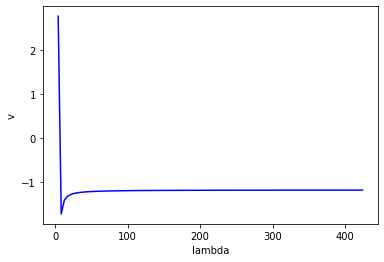

In [37]:
plt.xlabel('lambda')
plt.ylabel('v')
plt.plot(lambda_arr, v1_arr, color='blue')

Зависимость второго момента реального времени $v_2$ от интенсивности $\lambda$

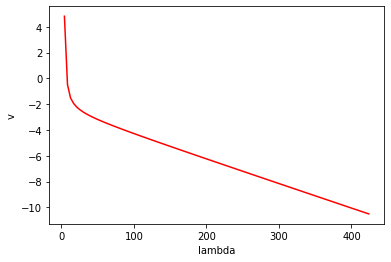

In [38]:
plt.xlabel('lambda')
plt.ylabel('v')
plt.plot(lambda_arr, v2_arr, color='red')

Зависимость третьего момента реального времени $v_3$ от интенсивности $\lambda$

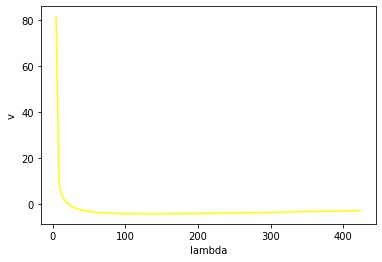

In [39]:
plt.xlabel('lambda')
plt.ylabel('v')
plt.plot(lambda_arr, v3_arr, color='yellow')

Зависимость первого, второго и третьего моментов реального времени $v_1, v_2, v_3$ от интенсивности $\lambda$

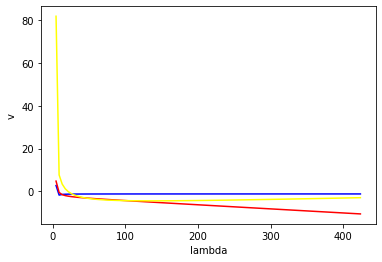

In [40]:
plt.xlabel('lambda')
plt.ylabel('v')
plt.plot(lambda_arr, v1_arr, color='blue')
plt.plot(lambda_arr, v2_arr, color='red')
plt.plot(lambda_arr, v3_arr, color='yellow')

Зависимость вектора $w_1$ от интенсивности $\lambda$

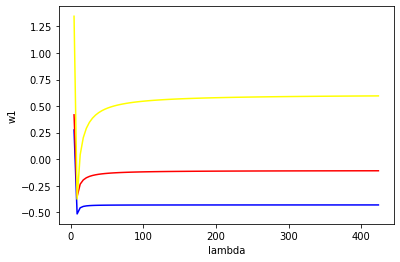

In [41]:
w11 = []
w12 = []
w13 = []
w11.append(w[1].item(1))
w12.append(w[1].item(2))
w13.append(w[1].item(3))
for i in range(number_of_points - 1):
    w11.append(w1_arr[i].item(1))
    w12.append(w1_arr[i].item(2))
    w13.append(w1_arr[i].item(3))
plt.xlabel('lambda')
plt.ylabel('w1')
plt.plot(lambda_arr, w11, color='blue')
plt.plot(lambda_arr, w12, color='red')
plt.plot(lambda_arr, w13, color='yellow')

Зависимость вектора $w_2$ от интенсивности $\lambda$

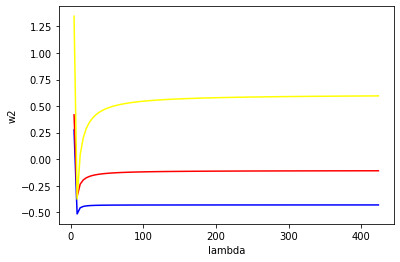

In [42]:
w21 = []
w22 = []
w23 = []
w21.append(w[2].item(1))
w22.append(w[2].item(2))
w23.append(w[2].item(3))
for i in range(number_of_points - 1):
    w21.append(w2_arr[i].item(1))
    w22.append(w2_arr[i].item(2))
    w23.append(w2_arr[i].item(3))
plt.xlabel('lambda')
plt.ylabel('w2')
plt.plot(lambda_arr, w11, color='blue')
plt.plot(lambda_arr, w12, color='red')
plt.plot(lambda_arr, w13, color='yellow')

Зависимость вектора $w_3$ от интенсивности $\lambda$

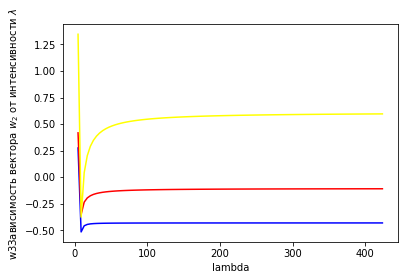

In [43]:
w31 = []
w32 = []
w33 = []
w31.append(w[3].item(1))
w32.append(w[3].item(2))
w33.append(w[3].item(3))
for i in range(number_of_points - 1):
    w31.append(w3_arr[i].item(1))
    w32.append(w3_arr[i].item(2))
    w33.append(w3_arr[i].item(3))
plt.xlabel('lambda')
plt.ylabel('w3Зависимость вектора $w_2$ от интенсивности $\lambda$')
plt.plot(lambda_arr, w11, color='blue')
plt.plot(lambda_arr, w12, color='red')
plt.plot(lambda_arr, w13, color='yellow')